<a href="https://colab.research.google.com/github/itharavenikarthik/Machine-learning/blob/main/ML_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_csv("/content/boston.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
x=df.drop("MEDV",axis=1)
y=df['MEDV']

In [8]:
import numpy as np
x=np.array(x)
y=np.array(y).reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.3,random_state=42
)

In [10]:
x_train

array([[2.98500e-02, 0.00000e+00, 2.18000e+00, ..., 1.87000e+01,
        3.94120e+02, 5.21000e+00],
       [1.31580e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.93300e+02, 1.20400e+01],
       [1.71420e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.96900e+02, 1.02100e+01],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [13]:
from sklearn.linear_model import Lasso

In [19]:
from sklearn.linear_model import LassoCV
alphas=np.logspace(-3,3,7)
lasso_cv=LassoCV(alphas=alphas,cv=10)
lasso_cv.fit(x_train,y_train)
print("Best alpha:",lasso_cv.alpha_)

Best alpha: 0.001


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
best_rigde=Lasso(alpha=lasso_cv.alpha_)
best_rigde.fit(x_train,y_train)
y_pred=best_rigde.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(f"MSE:{mse:.2f}")
print("RMSE:",rmse)
print("R2 Score:",r2)

MSE:21.52
RMSE: 4.639128228287351
R2 Score: 0.7111714316191494


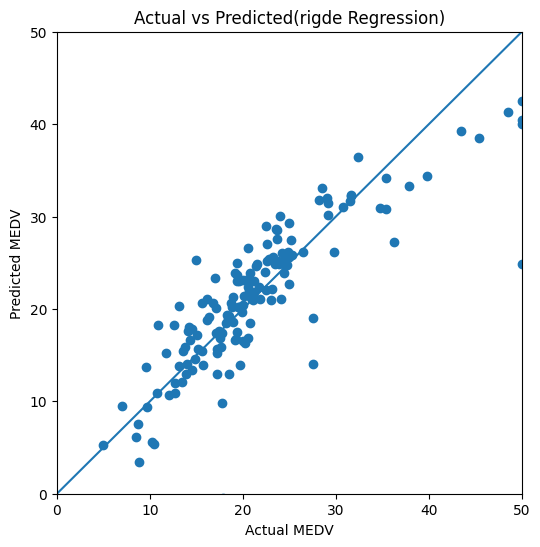

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
max_val=max(y_test.max(),y_pred.max())
plt.plot([0,max_val],[0,max_val],)
plt.xlim(0,max_val)
plt.ylim(0,max_val)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted(rigde Regression)")
plt.show()

In [27]:
y_pred=best_rigde.predict(x_train)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 22.55
R-squared Score: 0.74
Root Mean Squared Error: 4.75


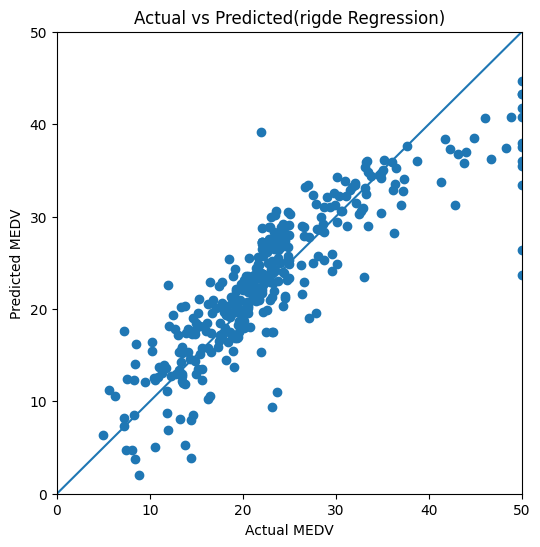

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(y_train,y_pred)
max_val=max(y_train.max(),y_pred.max())
plt.plot([0,max_val],[0,max_val],)
plt.xlim(0,max_val)
plt.ylim(0,max_val)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted(rigde Regression)")
plt.show()